In [1]:
%load_ext autoreload
%autoreload 2
import os.path as osp
from torch.utils.data import DataLoader
import numpy as np
import sys
#sys.path.append('../../')
import torch
import torch.nn as nn
import iled
import matplotlib.pyplot as plt

run 19

In [2]:
ls -lth /home/tau/emenier/data/iLED_public/runs/

total 0
drwxr-xr-x 2 emenier tau 75 févr. 28 18:31 run22/
drwxr-xr-x 2 emenier tau 75 févr. 28 15:33 run21/
drwxr-xr-x 2 emenier tau 75 févr. 28 10:14 run20/
drwxr-xr-x 2 emenier tau 75 févr. 28 09:40 run19/
drwxr-xr-x 2 emenier tau 75 févr. 27 15:37 run18/
drwxr-xr-x 2 emenier tau 75 févr. 25 12:52 run17/
drwxr-xr-x 2 emenier tau 75 févr. 23 20:17 run16/
drwxr-xr-x 2 emenier tau 75 févr. 22 18:09 run15/
drwxr-xr-x 2 emenier tau 75 févr. 22 10:00 run14/
drwxr-xr-x 2 emenier tau 75 févr. 22 10:00 run13/
drwxr-xr-x 2 emenier tau 75 févr. 21 23:51 run12/
drwxr-xr-x 2 emenier tau 75 févr. 21 14:03 run11/
drwxr-xr-x 2 emenier tau 75 févr. 21 09:46 run10/
drwxr-xr-x 2 emenier tau 75 févr. 21 09:45 run9/
drwxr-xr-x 2 emenier tau 75 févr. 20 19:54 run8/
drwxr-xr-x 2 emenier tau 75 févr. 20 11:14 run7/
drwxr-xr-x 2 emenier tau 75 févr. 20 09:44 run6/
drwxr-xr-x 2 emenier tau 75 févr. 19 09:40 run5/
drwxr-xr-x 2 emenier tau 75 févr. 18 16:54 run4/
drwxr-xr-x 2 emenier tau 75 févr. 17 14:57 run3/

In [3]:
work_dir = '/home/tau/emenier/data/iLED_public/'
save_dir = 'run22'

train_dataset = iled.data_utils.FHNDataset(osp.join(work_dir,'data'),'train')
val_dataset = iled.data_utils.FHNDataset(osp.join(work_dir,'data'),'val')

In [4]:
config = torch.load(osp.join(work_dir,'runs',save_dir,'config.trch'))
trainer = config.make()

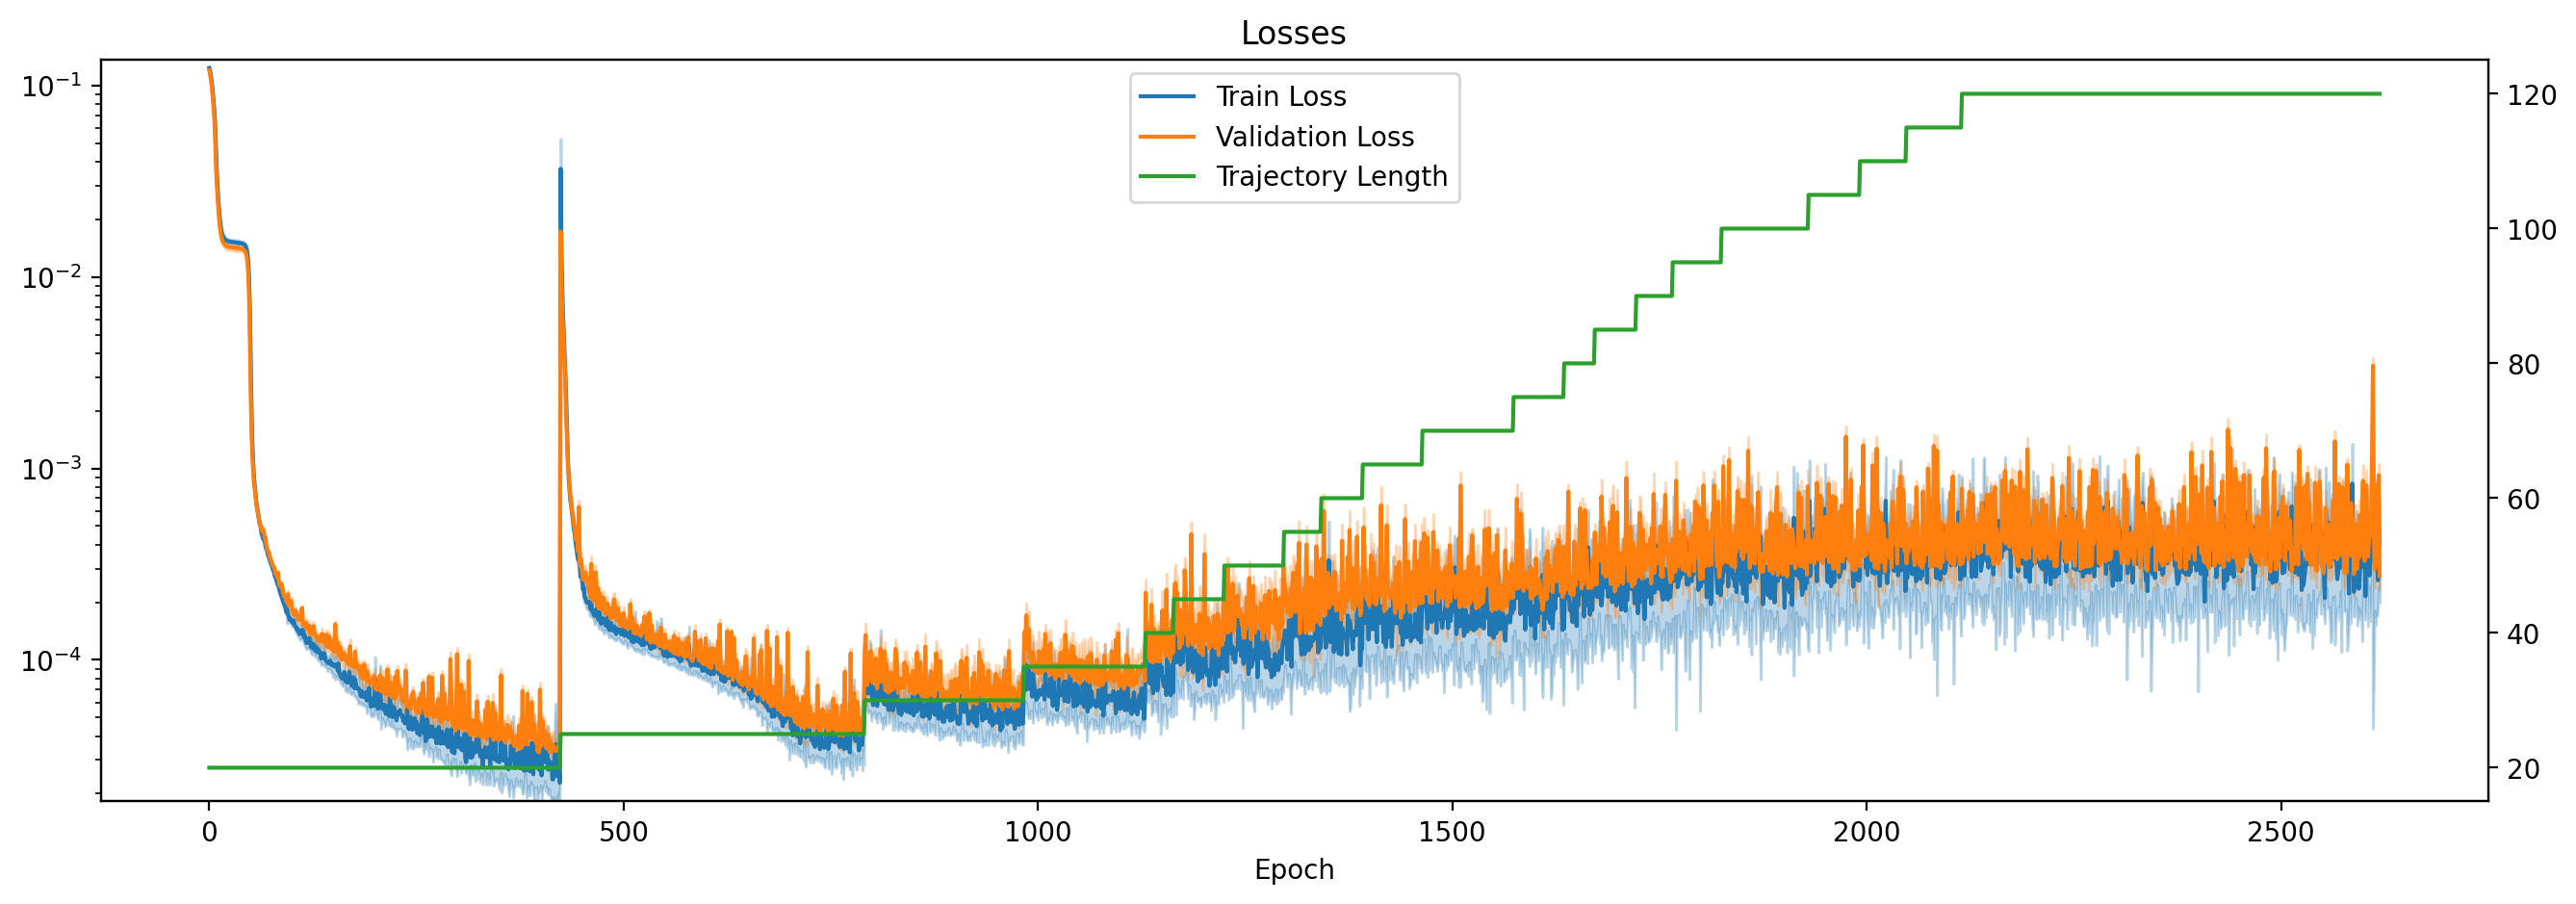

In [5]:
state = trainer.load(name='best.trch')
fig, ax = plt.subplots(figsize=(16,5),dpi=200)
iled.plotting.plot_losses(trainer.stats)

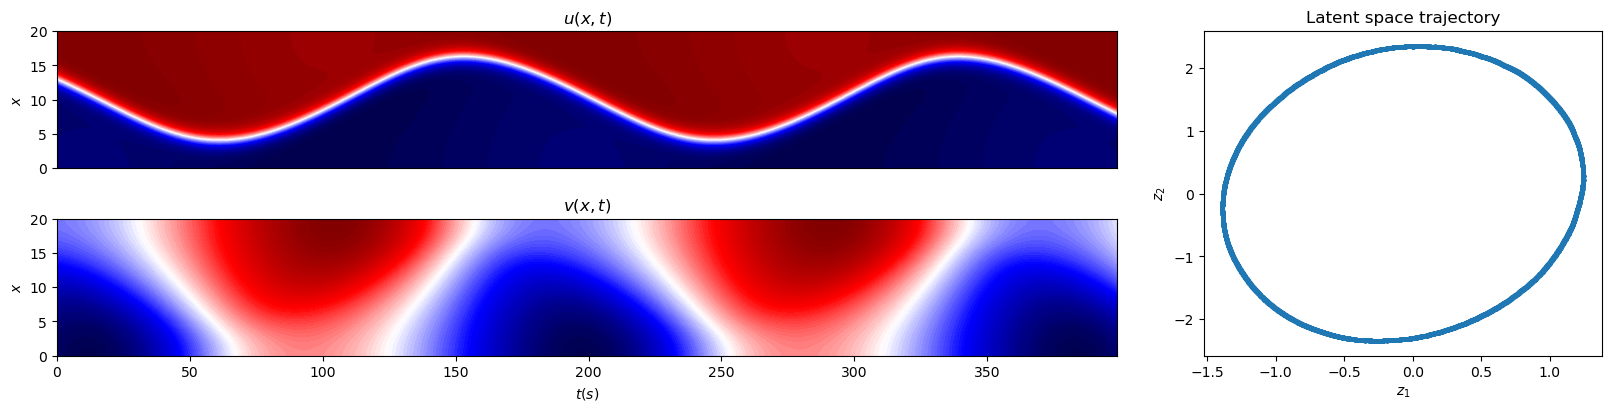

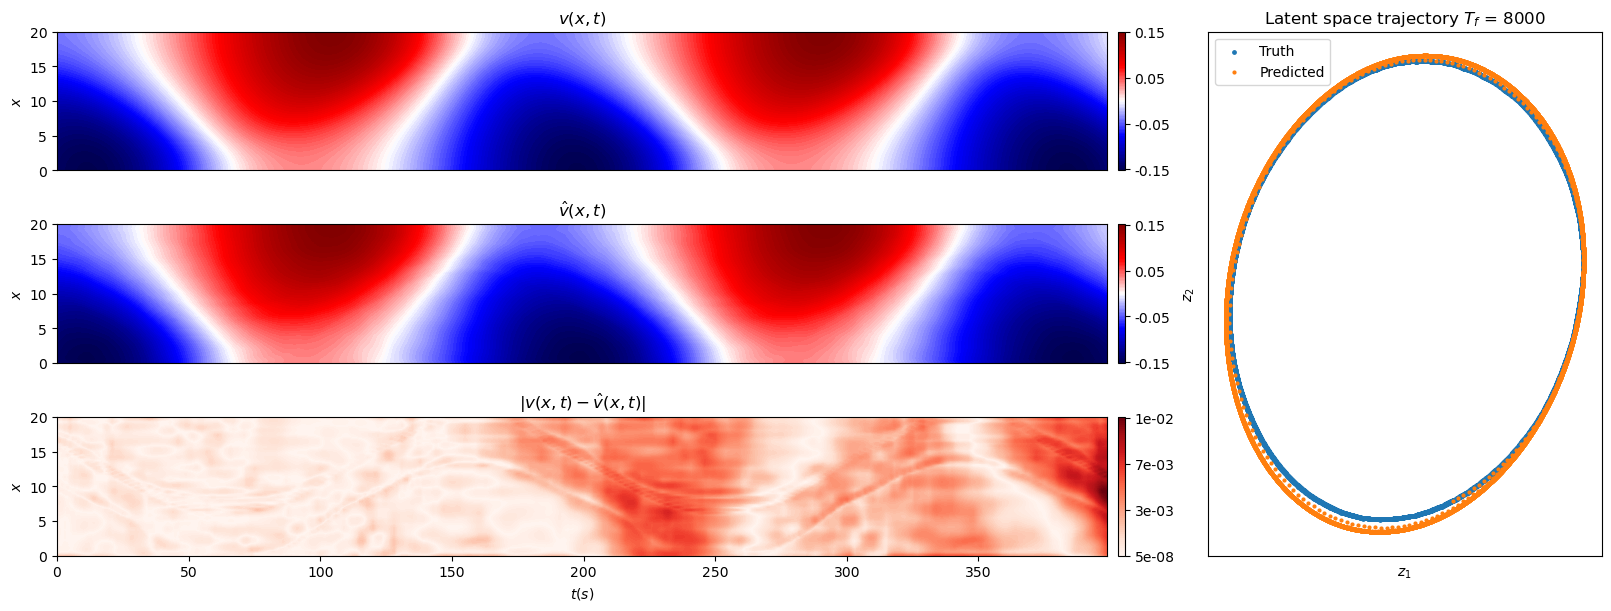

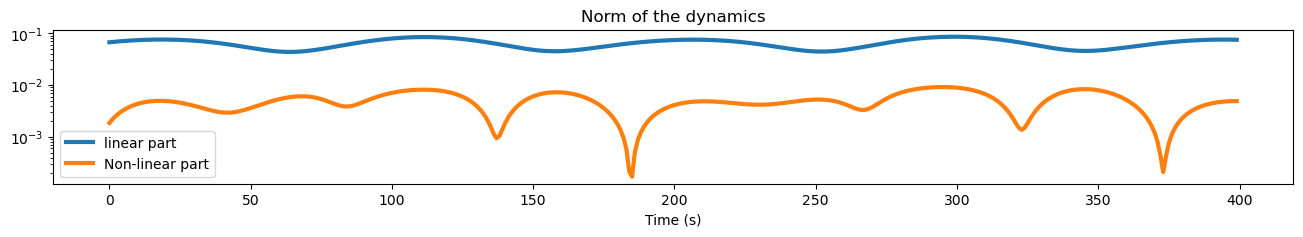

In [9]:

import fhn_plotting
test_dataset = iled.data_utils.FHNDataset(osp.join(work_dir,'data'),'test')
traj = test_dataset[np.random.choice(len(test_dataset))]
horizon = trainer.stats.nTmax_lst[-1]
horizon = 8000
fhn_plotting.encoded_plot(traj,trainer,Tvis=min(horizon,400),Tf=horizon,ticks=True)
fhn_plotting.prediction_plot(traj,trainer,Tvis=min(horizon,400),Tf=horizon)

In [11]:
eigs = np.linalg.eig(trainer.model.dynamics.linear_operator.weight().detach().cpu())[0]
omega = 2*np.pi*1/eigs[0].imag
print(eigs,omega,1/omega)

[-0.00137822+0.03358971j -0.00137822-0.03358971j] 187.05687212452008 0.005345967719027824


In [57]:
trainer.stats.nTmax_lst[-1]

74

In [58]:
trainer.model.config

<bound method EndToEndModel.config of EndToEndModel(
  (ae): AutoEncoder(
    (encoder): CNN1DEncoder(
      (layers): ModuleList(
        (0): PaddingLayer1D(
          (layer): ConstantPad1d(padding=(13, 14), value=0.0)
        )
        (1): Downsample(
          (filters): Conv1d(2, 8, kernel_size=(5,), stride=(1,), padding=same)
          (pooling): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
          (act): ReLU()
        )
        (2): Downsample(
          (filters): Conv1d(8, 16, kernel_size=(5,), stride=(1,), padding=same)
          (pooling): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
          (act): ReLU()
        )
        (3): Downsample(
          (filters): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=same)
          (pooling): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
          (act): ReLU()
        )
        (4): Downsample(
          (filters): Conv1d(32, 4, kernel_size=(5,), stride=(1,), padding=same)
          (pooling

In [59]:
trainer.config

TrainerConfig(model_config=EndToEndConfig(n_warmup=20, data_dt=1, substeps=1, init_nTmax=20, ae_config=AutoEncoderConfig(encoder_config=CNN1DEncoderConfig(activation=ReLU(), activation_output=Identity(), kernel_size=5, dim_input=101, dim_latent=2, layer_channels=[2, 8, 16, 32, 4], bias=True, latent_centering=True), decoder_config=CNN1DDecoderConfig(activation=ReLU(), activation_output=TanhPlus(
  (tanh): Tanh()
), kernel_size=5, dim_input=101, dim_latent=2, layer_channels=[4, 32, 16, 8, 2], unflatten_shape=(4, 8), bias=True)), dynamics_config=SplitDynamicsConfig(dim_latent=2, dim_hidden=16, activation=SiLU(), linear_operator='unconstrained', nl_operator='unconstrained', nl_width=32, nl_n_hidden_layers=2, default_substeps=1, zero_init=True)), save_path='/home/tau/emenier/data/iLED_public/runs/run19', losses_and_scales={'reconstruction': ['mse', 1], 'latent_forecast': ['mse', 0.1], 'nl_penalisation': ['norm_loss', 1e-05]}, dtype=torch.float32, optimizer='adam', optimizer_kwargs=defaultdi

In [112]:
list(trainer.model.dynamics.linear_operator.named_parameters())
trainer.model.dynamics.linear_operator.operator.parametrizations.weight.original.data.fill_(0.)

tensor([[0., 0.],
        [0., 0.]], device='cuda:0')

In [113]:
trainer.model.dynamics.linear_operator.weight()

tensor([[0., 0.],
        [0., 0.]], device='cuda:0', grad_fn=<SubBackward0>)